In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
!pip uninstall scikit-learn
!pip install scikit-learn==1.1.3

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/scikit_learn-1.2.2.dist-info/*
    /usr/local/lib/python3.9/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.9/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
y
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 44.2 MB/s eta 0:00:00


In [ ]:
"""
Features and Response:
1.CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to ﬁve Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per $10,000
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in $1000s
"""
from sklearn.datasets import load_boston
donnees_boston = load_boston()
donnees_boston.keys()

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
#On affiche la description du jeu de données
donnees_boston.DESCR.split("\n")

['.. _boston_dataset:',
 '',
 'Boston house prices dataset',
 '---------------------------',
 '',
 '**Data Set Characteristics:**  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways

In [ ]:
#Transformation de notre jeu de données en Data Frame grace à pandas
donnees_boston_df = pd.DataFrame(donnees_boston.data, columns=donnees_boston.feature_names)
#on affiche les 5 premières lignes
donnees_boston_df.head()
#on créé une nouvelle colonne qui est PRIX. ce qui equivaut à MEDV du jeu de données
donnees_boston_df['PRIX'] = donnees_boston.target
#on vérifie s'il n'y pas des valeurs nulles
donnees_boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRIX       0
dtype: int64

<Axes: >

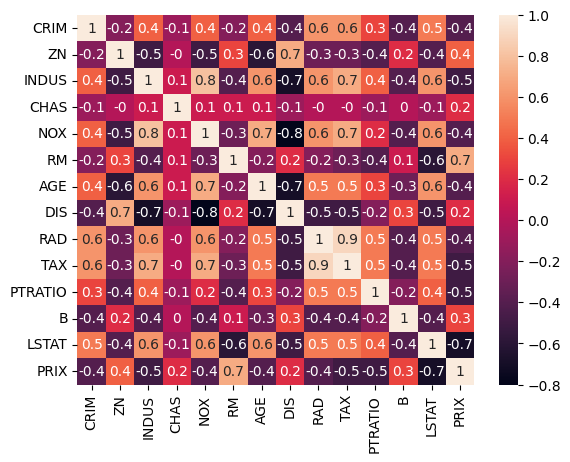

In [ ]:
#etude de la correlation
matrice_corr = donnees_boston_df.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

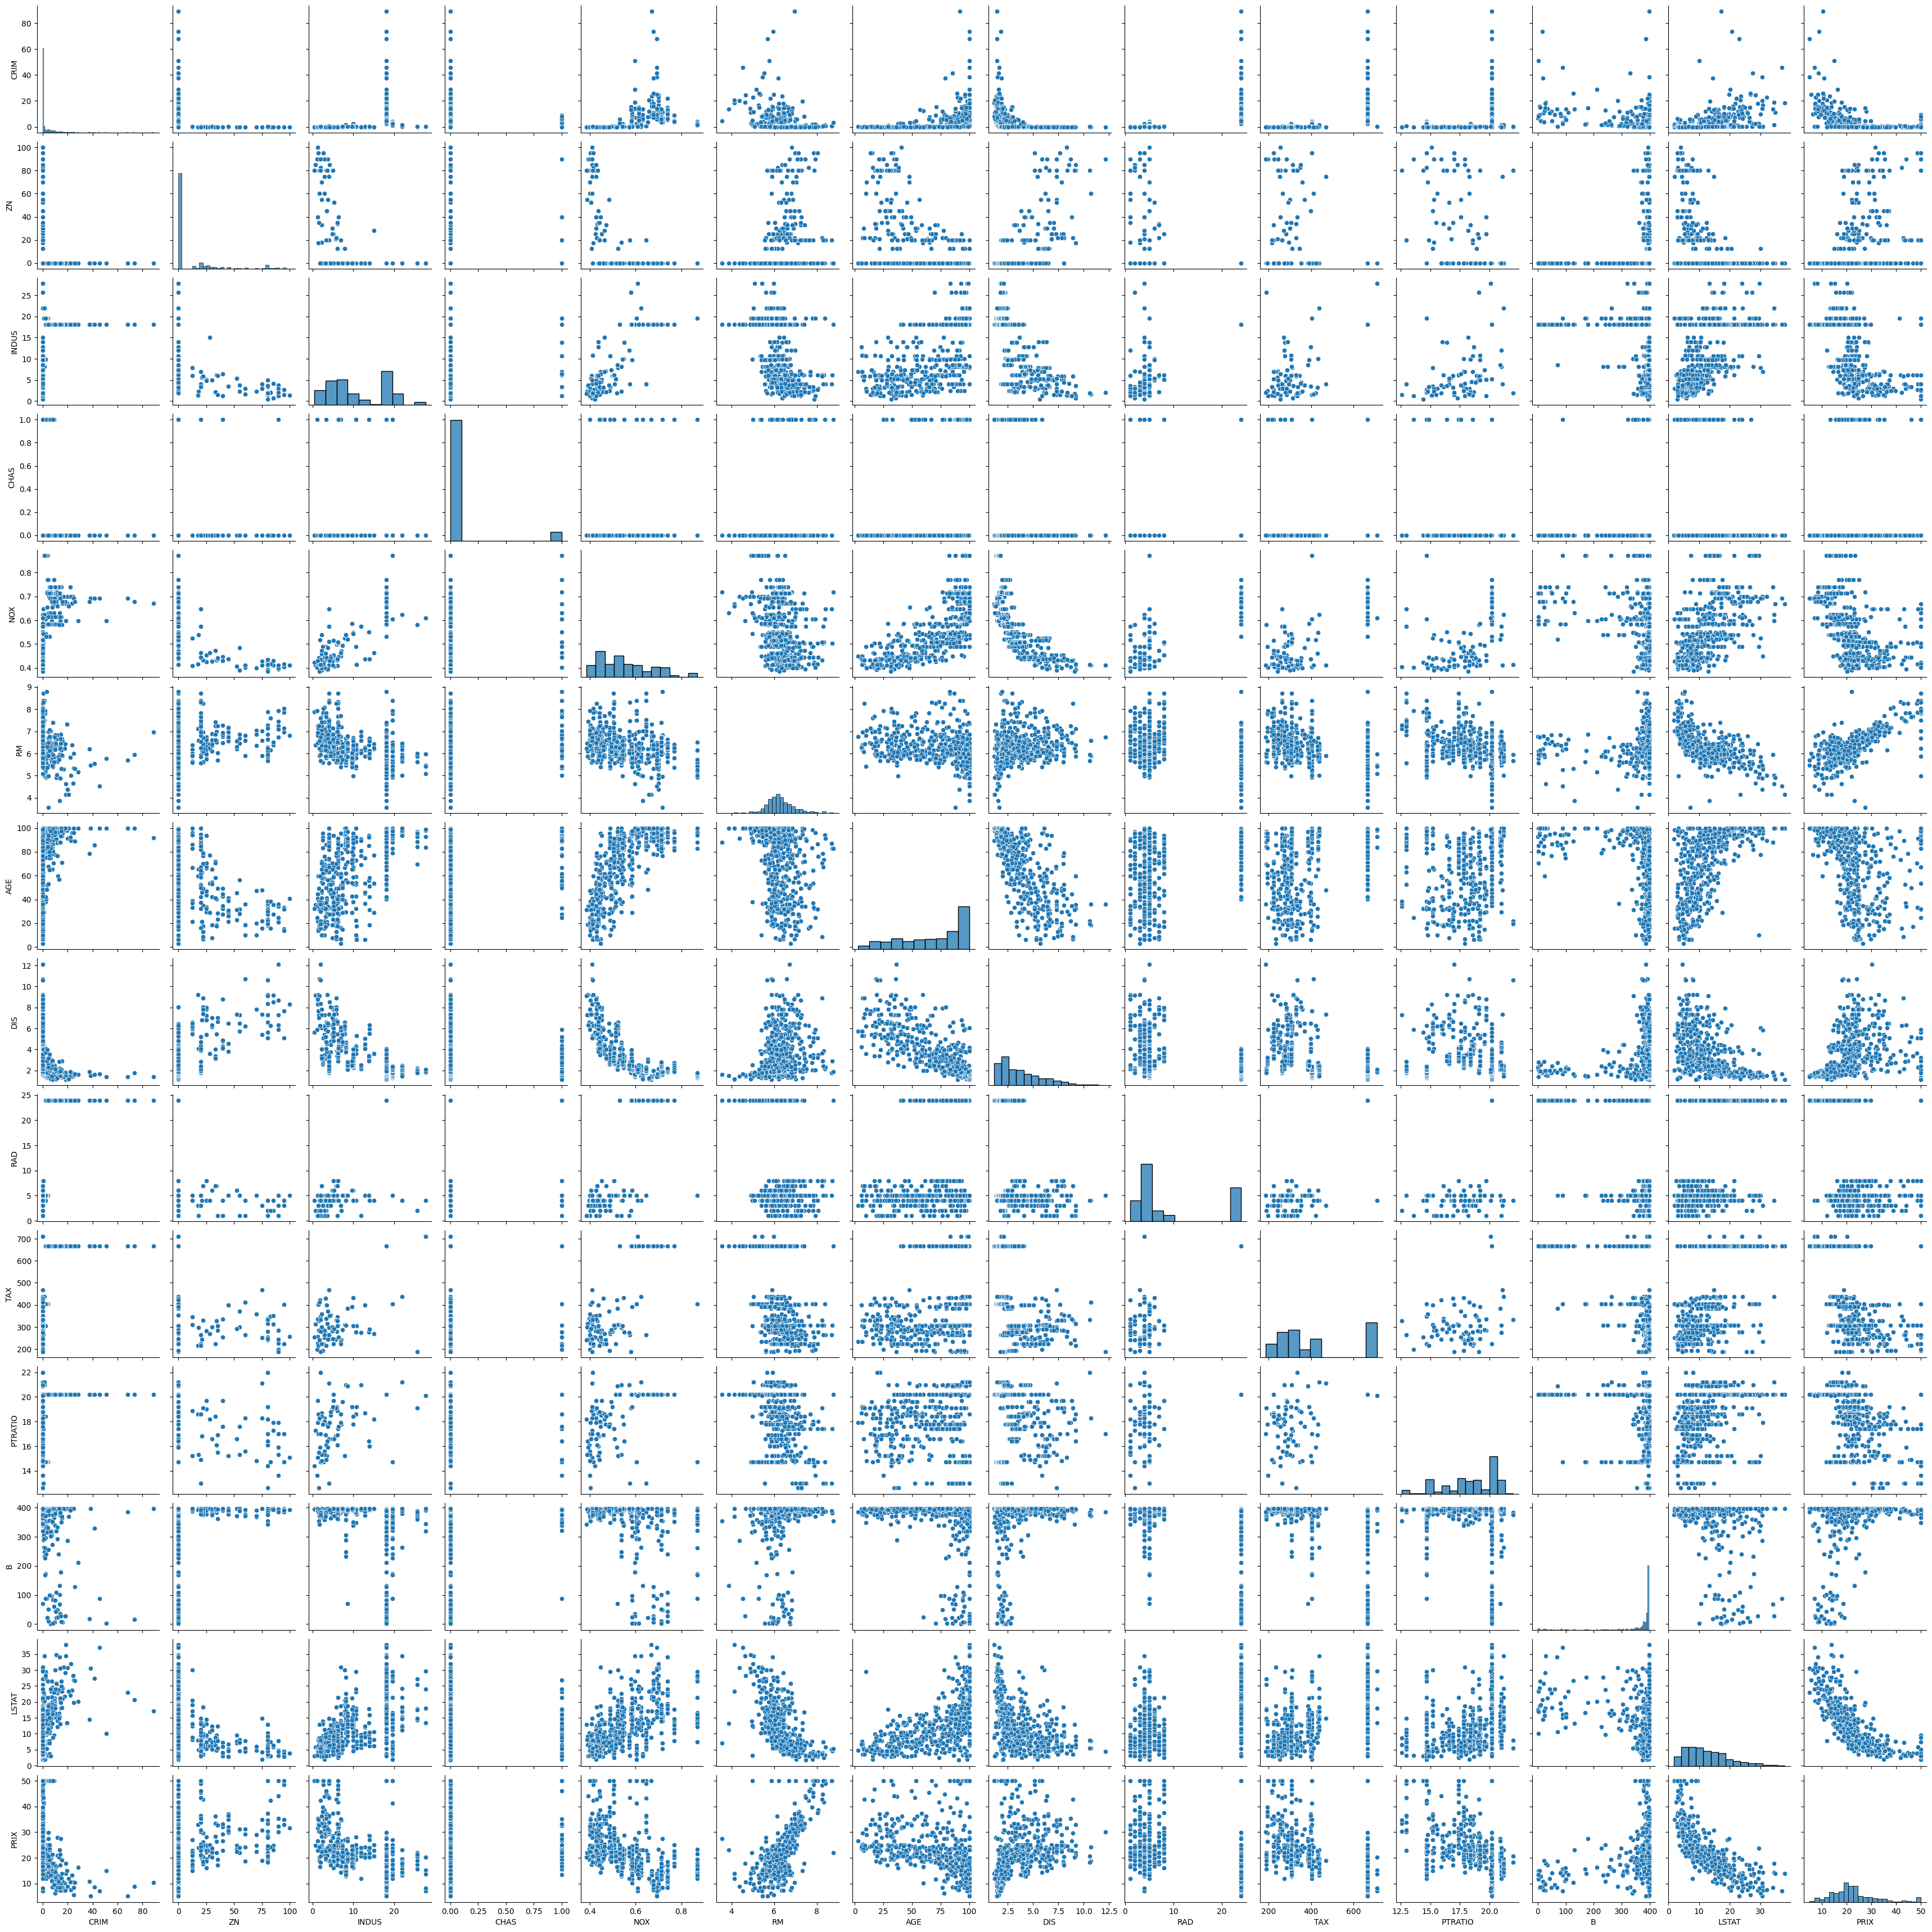

In [ ]:
sns.pairplot(donnees_boston_df)

In [ ]:
"""Le prix a une forte corrélation avec LSTAT et RM. Cependant il ne faut pas négliger les autres attributs comme CRIM,ZN,INDUS…
car leur corrélation sont pas proches de 0. Il faut savoir que lorsqu’on fait une régression linéaire on pose certaines hypothèses
notamment la Non-colinéarité des variables explicatives (une variable explicative ne doit pas pouvoir s’écrire comme combinaison
linéaire des autres).

TAX et RAD ont une corrélation de 0.9; NOX et  DIS et AGE ont une corrélation de 0.7 ; DIS et INDUS ont une corrélation de 0.7.
Après une analyse minutieuse nous choisissons : LSAT, RM,TAX,PTRATIO

"""

'Le prix a une forte corrélation avec LSTAT et RM. Cependant il ne faut pas négliger les autres attributs comme CRIM,ZN,INDUS… \ncar leur corrélation sont pas proches de 0. Il faut savoir que lorsqu’on fait une régression linéaire on pose certaines hypothèses \nnotamment la Non-colinéarité des variables explicatives (une variable explicative ne doit pas pouvoir s’écrire comme combinaison \nlinéaire des autres).\n\nTAX et RAD ont une corrélation de 0.9; NOX et  DIS et AGE ont une corrélation de 0.7 ; DIS et INDUS ont une corrélation de 0.7.\nAprès une analyse minutieuse nous choisissons : LSAT, RM,TAX,PTRATIO\n\n'

In [ ]:
#on utilise seulement 4 variables explicatives
X=pd.DataFrame(np.c_[donnees_boston_df['LSTAT'],donnees_boston_df['RM'],donnees_boston_df['TAX'],donnees_boston_df['PTRATIO']], columns = ['LSTAT','RM','TAX','PTRATIO'])
Y = donnees_boston_df['PRIX']

In [ ]:
#Split the data into training and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.4, random_state=1)
#Create linear regression object


In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
#Fit multiple Linear Regression model to our Train set
regressor.fit(X_train,Y_train)
# Predicting the Test set results:
y_pred= regressor.predict(X_test)


Coefficients: 
 [-5.44891434e-01  4.35482554e+00 -2.19935566e-03 -8.02685024e-01]
Variance score: 0.6598637402011475


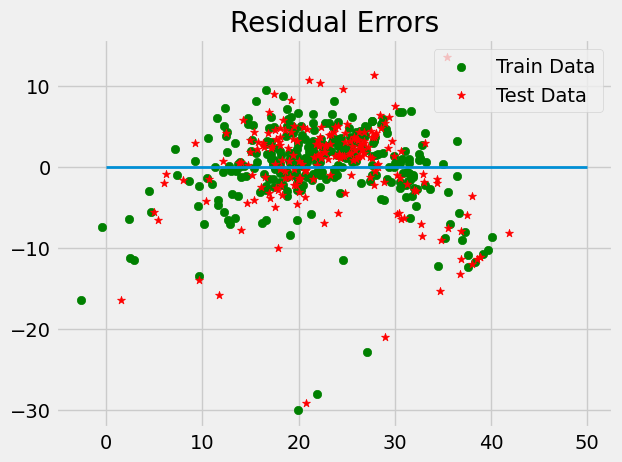

In [ ]:

# regression coefficients
print('Coefficients: \n', regressor.coef_)

# variance score: 1 means perfect prediction
print("Variance score: {}".format(regressor.score(X_test,Y_test)))

# plot for residual error
## setting plot style
plt.style.use("fivethirtyeight")
## plotting residual errors in training data
plt.scatter(regressor.predict(X_train), regressor.predict(X_train)-Y_train, color="green",
            marker="o",label="Train Data")
## plotting residual errors in test data
plt.scatter(regressor.predict(X_test), regressor.predict(X_test)-Y_test, color="red",
            marker="*",label="Test Data")
## plotting line for zero residual error
plt.hlines(y=0,xmin=0, xmax=50,linewidth=2)
## plotting legend
plt.legend(loc="upper right")
## plot title
plt.title("Residual Errors")
## function to show plot
plt.show()


In [ ]:
from sklearn.metrics import r2_score
y_test_predict = regressor.predict(X_test)

r2 = r2_score(Y_test, y_test_predict)
print(r2)

0.6598637402011475


In [ ]:
X=pd.DataFrame(np.c_[donnees_boston_df['LSTAT'],donnees_boston_df['RM'],donnees_boston_df['TAX'],donnees_boston_df['PTRATIO']], columns = ['LSTAT','RM','TAX','PTRATIO'])

Y = donnees_boston_df['PRIX']
print(X.shape)
print(Y.shape)
X=X.iloc[:,:].values
Y=Y.iloc[:].values
print(Y.shape)
Y=Y.reshape(Y.shape[0],1)

(506, 4)
(506,)
(506,)


In [ ]:
#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X1 = sc_X.fit_transform(X)
Y1 = sc_y.fit_transform(Y)


In [ ]:
#Split the data into training and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X1,Y1,test_size=0.4, random_state=1)



In [ ]:

#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be linear,polynomial or gaussian.
#SVR. We have a non-linear condition so we can select polynomial or gaussian but here
#we select RBF(a gaussian type) kernel.
regressor = SVR(kernel='rbf')
regressor.fit(X_train,Y_train)




/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
print(sc_X.transform(np.array([6.5,1,1,1]).reshape(1, -1)).shape) #bch tbadlou normalisé. regression yest7a9 normalisation

(1, 4)


In [ ]:
#5 Predicting a new result
y_pred = sc_y.inverse_transform((regressor.predict(sc_X.transform(np.array([[6.5,1,1,1]]).reshape(1, 4))).reshape(1,-1))) # bch traj3ou mch normalisé
print(y_pred )

[[22.77154836]]


In [ ]:
#6 Visualising the Support Vector train Regression  results
YDT=regressor.predict(X_train)
plt.scatter(X_train[:,0], Y_train, color = 'magenta')
plt.plot(X_train[:, 0, YDT], color='green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.xlabel('Features')
plt.ylabel('PRIX')
plt.show()

SyntaxError: ignored

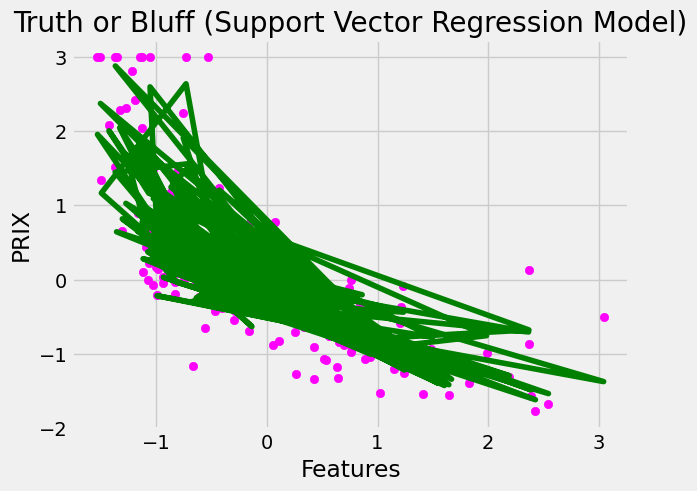

In [ ]:
#6 Visualising the Support Vector test Regression  results

YDT=regressor.predict(X_test)
plt.scatter(X_test[:,0], Y_test, color = 'magenta')

plt.plot(X_test[:,0], YDT, color = 'green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.xlabel('Features')
plt.ylabel('PRIX')
plt.show()

In [ ]:
# model evaluation for testing set
# Evaluation du training set
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
rmse_test = (np.sqrt(mean_squared_error(Y_test, YDT)))
r2_test = r2_score(Y_test, YDT)

print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse_test))
print('le score R2 est {}'.format(r2_test))

La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 0.4331481152025608
le score R2 est 0.8246253205845977
